**Лекция 6**

# Условное математическое ожидание

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Условное-математическое-ожидание" data-toc-modified-id="Условное-математическое-ожидание-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Условное математическое ожидание</a></span><ul class="toc-item"><li><span><a href="#Неформальное-понятие-и-геометрическая-аналогия" data-toc-modified-id="Неформальное-понятие-и-геометрическая-аналогия-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Неформальное понятие и геометрическая аналогия</a></span></li><li><span><a href="#Определение-и-свойства" data-toc-modified-id="Определение-и-свойства-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Определение и свойства</a></span></li><li><span><a href="#Условная-дисперсия" data-toc-modified-id="Условная-дисперсия-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Условная дисперсия</a></span></li><li><span><a href="#Условное-распределение" data-toc-modified-id="Условное-распределение-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Условное распределение</a></span></li></ul></li><li><span><a href="#Оптимальная-оценка" data-toc-modified-id="Оптимальная-оценка-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Оптимальная оценка</a></span><ul class="toc-item"><li><span><a href="#Теорема-об-оптимальной-оценке" data-toc-modified-id="Теорема-об-оптимальной-оценке-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Теорема об оптимальной оценке</a></span></li><li><span><a href="#Кривая-регрессии" data-toc-modified-id="Кривая-регрессии-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Кривая регрессии</a></span></li></ul></li><li><span><a href="#Частное-и-условное-распределения" data-toc-modified-id="Частное-и-условное-распределения-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Частное и условное распределения</a></span><ul class="toc-item"><li><span><a href="#Частное-(маргинальное)-распределение" data-toc-modified-id="Частное-(маргинальное)-распределение-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Частное (маргинальное) распределение</a></span></li><li><span><a href="#Условное-распределение" data-toc-modified-id="Условное-распределение-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Условное распределение</a></span></li></ul></li><li><span><a href="#Дополнительно" data-toc-modified-id="Дополнительно-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Дополнительно</a></span></li><li><span><a href="#Источники" data-toc-modified-id="Источники-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Источники</a></span></li></ul></div>

In [1]:
# Imports
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
import sys
sys.path.append('./scripts')
from GP_utils import generate_gauss_surface

In [3]:
# Styles, fonts
import matplotlib
matplotlib.rcParams['font.size'] = 12
from matplotlib import cm # Colormaps

import seaborn
from IPython.display import Image
im_width = 1000

In [4]:
# %config InlineBackend.figure_formats = ['pdf']
# %config Completer.use_jedi = False

---

## Условное математическое ожидание

### Неформальное понятие и геометрическая аналогия

Для начала введём понятие *условного математического ожидания* неформально.

Пусть $\xi$ и $\eta$ &mdash; две случайные величины на некотором вероятностном пространстве.
Пусть $L = L(\xi)$ &mdash; множество, в котором собраны все случайные величины $g(x)$, являющиеся функциями от $\xi$.
Среди элементов множества $L$ мы хотим найти случайную величину $\hat{\eta}$ &laquo;наиболее похожую&raquo; на $\eta$.
Такую случайную величину $\hat{\eta}$ будем называть *условным математическим ожиданием $\eta$ относительно $\xi$* и обозначать $\mathrm{E}(\eta|\xi)$.


&laquo;Похожесть&raquo; двух случайных величин $\eta$ и $\hat{\eta}$ формализуем с помощью процедуры ортогонального проектирования. Для этого введём скалярное произведение двух случайных величин $(\xi, \eta) = \mathrm{cov}(\xi, \eta)$.

Тогда условное математическое ожидание $\mathrm{E}(\eta|\xi)$ случайной величины $\eta$ относительно $\xi$ можно представлять себе как результат *ортогонального проектирования* случайной величины $\eta$ на пространство $L(\xi)$.

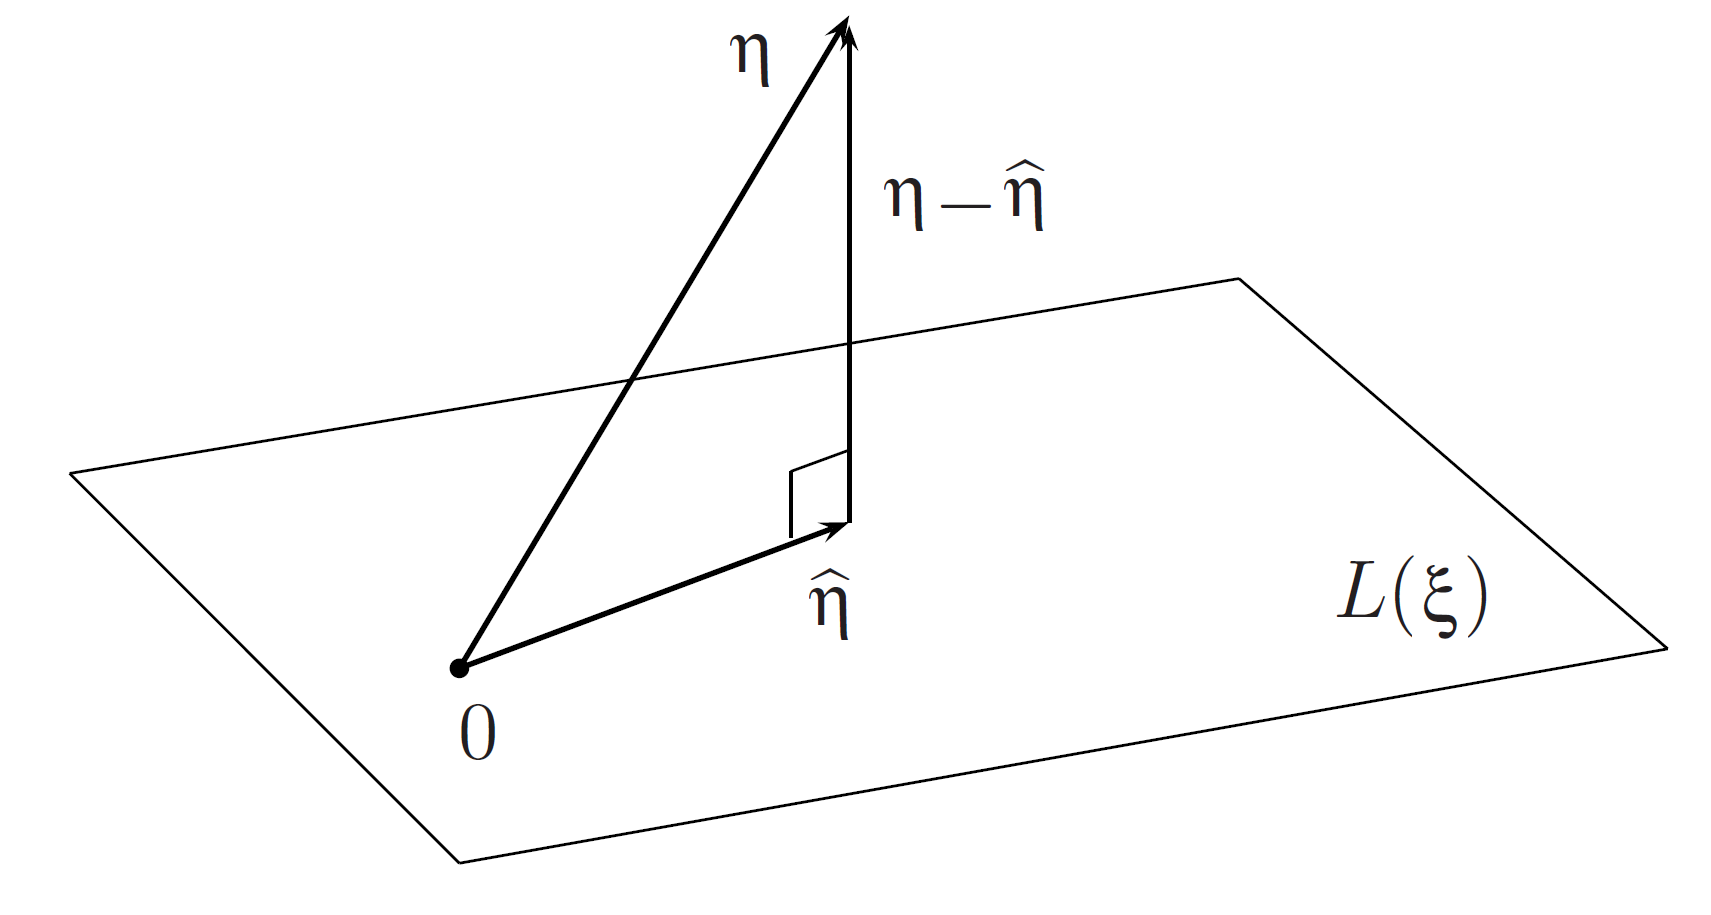

In [5]:
display(Image('./pix/06.CondExpect/CondExpect.png', width=0.50*im_width))

Результат проектирования &mdash; такая случайная величина $\mathrm{E}(\eta|\xi) = \hat{\eta}$ из $L$, для которой выполнено основное свойство ортопроекции: её разность с $\eta$ ортогональна всем элементам $L$.
Ортогональность означает, что для любой $g(\xi) \in L$ скалярное произведение $(\eta - \hat{\eta},\, g(\xi))$ обращается в нуль, т.е.
$$
  \mathrm{cov}\left[(\eta - \hat{\eta}),\, g(\xi) \right] = 0 \quad \mathrm{или} \quad \mathrm{cov}\left[ \eta,\, g(\xi) \right] = \mathrm{cov}\left[ \hat{\eta},\, g(\xi) \right].
$$

### Определение и свойства

**Определение.**
Пусть $L = L(\xi)$ &mdash; множество всех функций от случайной величины $\xi$.
*Условным математическим ожиданием* $\mathrm{E}(\eta|\xi)$ называется *случайная величина* $\hat{\eta} \in L$, удовлетворяющая тождеству ортопроекции:
$$
  \mathrm{cov}\left[ \eta,\, g(\xi) \right] = \mathrm{cov}\left[ \hat{\eta},\, g(\xi) \right] \quad \forall g(\xi) \in L.  
$$

**Свойства:**

1. УМО &mdash; это случайная величина
1. если $\xi$ и $\eta$ независимы, то $\mathrm{E}(\eta|\xi) = \mathrm{E}(\eta)$
1. линейность: $\mathrm{E}(\eta_1 + \eta_2|\xi) = \mathrm{E}(\eta_1|\xi) + \mathrm{E}(\eta_2|\xi)$, в частности, $\mathrm{E}(a\eta + b|\xi) = a\mathrm{E}(\eta|\xi) + b$
1. известные величины можно выносить из-под знака математического ожидания: $\mathrm{E}(f(\xi) \cdot \eta|\xi) = f(\xi) \cdot \mathrm{E}(\eta|\xi)$, в частности, $\mathrm{E}(f(\xi)|\xi) = f(\xi)$
1. формула полного мат. ожидания: $\mathrm{E}\left[ \mathrm{E}(\eta|\xi) \right] = \mathrm{E}(\eta)$ (*Adam's law*)
1. ! $\min\limits_{g(\xi) \in L} \mathrm{E}[\eta - g(\xi)]^2 = \mathrm{E}[\eta - \hat{\eta}]^2$

### Условная дисперсия

**Определение.** Условной дисперсией (скедастикой) $\mathrm{D}(\eta|\xi)$ называется *случайная величина*, вычисляемая по формуле
$$
  \mathrm{D}(\eta|\xi) = \mathrm{E}\left[ (\eta - \mathrm{E}(\eta|\xi))^2 |\xi \right].
$$

**Свойства:**

1. $\mathrm{D}(\eta|\xi) = \mathrm{E}(\eta^2|\xi) - (\mathrm{E}(\eta|\xi))^2$
1. $\mathrm{D}(a\eta + b|\xi) = a^2 \mathrm{D}(\eta|\xi)$
1. $\mathrm{D}(f(\xi) \cdot \eta|\xi) = (f(\xi))^2 \cdot \mathrm{D}(\eta|\xi)$
1. формула полной дисперсии: $\mathrm{D}(\eta) = \mathrm{E}\left[ \mathrm{D}(\eta|\xi) \right] + \mathrm{D}\left[ \mathrm{E}(\eta|\xi) \right]$ (*Eve's law*)

**Пример.**
Рассмотрим выборку данных, состоящую из нескольких частей.
Например, рост людей в различных городах.
Пусть нам известно математическое ожидание и дисперсия каждой части.
Требуется найти математическое ожидание и дисперсию всей выборки.

In [6]:
def get_bins(X):
    return 3*int(X.max()-X.min())

In [7]:
N = int(1e4)
k1, k2 = 3, 1
m1, s1 = 170., 4.
X1 = np.random.normal(loc=m1, scale=s1, size=k1*N)
m2, s2 = 180., 1.
X2 = np.random.normal(loc=m2, scale=s2, size=k2*N)

print(f'm1 = {np.mean(X1):.2f}, D1 = {np.var(X1):.2f}')
print(f'm2 = {np.mean(X2):.2f}, D2 = {np.var(X2):.2f}')

m1 = 170.05, D1 = 16.14
m2 = 179.99, D2 = 0.99


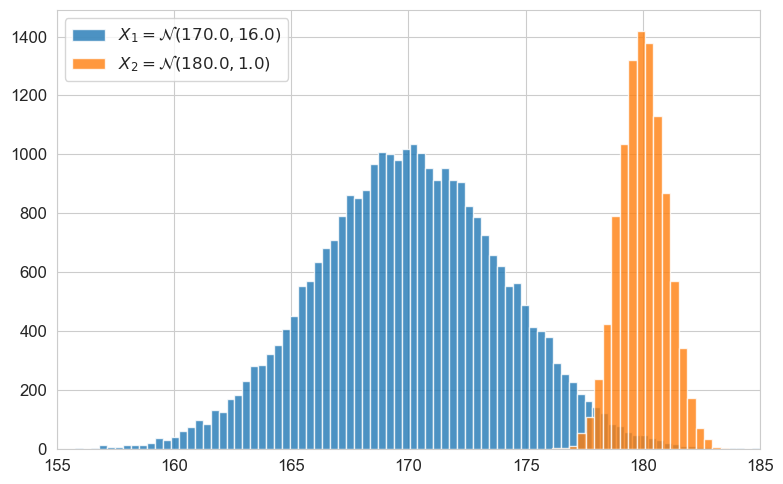

In [8]:
seaborn.set_style('whitegrid')
fig = plt.figure(figsize=(8, 5))
ax = plt.subplot(1,1,1)
plt.hist(X1, bins=get_bins(X1), alpha=0.8, label=f"$X_1=\mathcal{{N}}({m1}, {s1**2})$")
plt.hist(X2, bins=get_bins(X2), alpha=0.8, label=f"$X_2=\mathcal{{N}}({m2}, {s2**2})$")

plt.xlim([155, 185])
plt.legend()
plt.tight_layout()
plt.show()

Математическое ожидание полной выборки найдём по формуле Адама (взвешенная сумма мат. ожиданий), а дисперсию &mdash; по формуле Евы (мат. ожидание дисперсий + дисперсия мат. ожиданий).

In [9]:
w1, w2 = k1/(k1+k2), k2/(k1+k2)
m3 = w1*m1 + w2*m2
D3 = w1*s1**2 + w2*s2**2 + w1*(m1-m3)**2 + w2*(m2-m3)**2
s3 = D3**0.5
print(f'm3_teor = {m3:.2f}, D3_teor = {D3:.2f}')

m3_teor = 172.50, D3_teor = 31.00


In [10]:
X3 = np.concatenate([X1,X2])
print(f'm3_act = {np.mean(X3):.2f}, D3_act = {np.var(X3):.2f}')

m3_act = 172.53, D3_act = 30.90


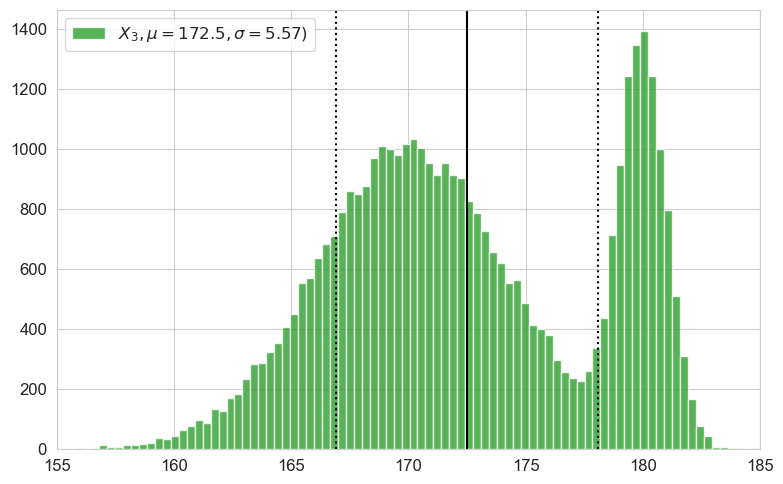

In [11]:
fig = plt.figure(figsize=(8, 5))
ax = plt.subplot(1,1,1)
plt.hist(X3, bins=get_bins(X3), color=cm.tab10(2), alpha=0.8,
         label=f"$X_3, \mu={m3}, \sigma={s3:.3})$")
plt.axvline(m3, c='k')
plt.axvline(m3-s3, c='k', ls=':')
plt.axvline(m3+s3, c='k', ls=':')

plt.xlim([155, 185])
plt.legend()
plt.tight_layout()
plt.show()

### Условное распределение

Пусть ($\xi$, $\eta$) &mdash; пара случайных величин с плотностью совместного распределения $f_{\xi,\eta}(x, y)$.
Пусть $f_{\xi}(x)$ и $f_{\eta}(y)$ &mdash; плотности распределения вероятностей случайных величин $\xi$ и $\eta$.

Тогда *плотность условного распределения вероятностей* можно определить с помощью следующей формулы (обобщение формулы Байеса):
$$
  f_{\eta|\xi}(y|x) = \frac{f_{\xi,\eta}(x, y)}{f_{\xi}(x)} = \frac{f_{\xi,\eta}(x, y)}{\int\limits_{-\infty}^{\infty} f_{\xi,\eta}(x,y) dy}.
$$

А условное математическое ожидание можно вычислить по формуле $\mathrm{E}(\eta|\xi) = h(\eta)$, где функция $h$ имеет вид
$$
  h(x) = \mathrm{E}(\eta|\xi=x) = \int\limits_{-\infty}^{\infty} y f_{\eta|\xi}(y|x) dy.
$$

Теория условных математических ожиданий позволяет дать обобщение теоремы Байеса, находящее применения в статистике.
Обобщённая теорема Байеса, являющаяся одним из основных средств при &laquo;байесовском подходе&raquo; в математической статистике, даёт ответ на вопрос о том, как *перераспределяется* наше знание о распределении случайной величины $\eta$ в зависимости от результатов наблюдений над статистически с ней связанной случайной величиной $\xi$.

---

## Оптимальная оценка

### Теорема об оптимальной оценке

Убедительной иллюстрацией полезности понятия условного математического ожидания является его применение
к решению следующей задачи, относящейся к *теории оценивания*.

Пусть $(\xi, \eta)$ &mdash; пара случайных величин, из которых $\xi$ наблюдаема, а $\eta$ наблюдению не подлежит.
Спрашивается, как по значениям наблюдений над $\xi$ &laquo;оценить&raquo; ненаблюдаемую компоненту $\eta$?

Вспомним введённое ранее понятие оценки случайной величины.
Случайную величину $\varphi(\xi)$ будем называть *оценкой* $\eta$ по $\xi$, а величину $\mathrm{E}\left[\eta-\varphi(\xi)\right]^2$ &mdash; *среднеквадратической ошибкой* этой оценки.
Оценку $\varphi^\ast(\xi)$ назовём *оптимальной* (в среднеквадратическом смысле), если
$$
  \Delta \equiv \mathrm{E}\left[\eta-\varphi^\ast(\xi)\right]^2 = \min_\varphi \mathrm{E}\left[\eta-\varphi(\xi)\right]^2,
$$
где минимум берётся по всем функциям $\varphi=\varphi(x)$.

**Теорема.** Пусть $\mathrm{E}\eta^2 < \infty$. Тогда оптимальная оценка $\varphi^\ast = \varphi^\ast(\xi)$ существует и в качестве $\varphi^\ast(x)$ может быть взято условное математическое ожидание
$$ \varphi^\ast(x) = \mathrm{E}(\eta|\xi = x). $$

### Кривая регрессии

Рассмотрим структуру функции $\varphi^\ast(x)$ в предположении, что $(\xi, \eta)$ &mdash; гауссовская пара с плотностью, задаваемой формулой
$$
  f_{\xi,\eta}(x, y) = \frac{1}{2\pi\sigma_1\sigma_2\sqrt{1-\rho^2}} \, \exp\left\{-\frac{1}{2(1-\rho^2)} \left[ \frac{(x-m_1)^2}{\sigma_1^2} - 2\rho\frac{(x-m_1)(y-m_2)}{\sigma_1\sigma_2} + \frac{(y-m_2)^2}{\sigma_2^2} \right]\right\}.
$$

Тогда плотность $f_{\eta|\xi}(y|x)$ условного распределения вероятностей задаётся формулой
$$
  f_{\eta|\xi}(y|x) = \frac{1}{\sqrt{2\pi(1-\rho^2)\sigma_2^2}} \, \exp\left\{-\frac{(y-m(x))^2}{2\sigma_2^2 (1-\rho^2)} \right\},
$$
где
$$
  m(x) = m_2 + \frac{\sigma_2}{\sigma_1}\rho \cdot (x-m_1).
$$

Тогда
$$
   \mathrm{E}(\eta|\xi=x) = \int\limits_{-\infty}^{\infty} y f_{\eta|\xi}(y|x) dy = m(x)
$$
и
$$
   \mathrm{D}(\eta|\xi=x) \equiv \mathrm{E} \left[ (\eta-\hat{\eta})^2|\xi=x \right]
   = \int\limits_{-\infty}^{\infty} (y-m(x))^2 f_{\eta|\xi}(y|x) dy = \sigma_2^2 (1-\rho^2).
$$

Заметим, что условное мат. ожидание является линейной функцией от $\xi$, а условная дисперсия от $\xi$ не зависит.

**Теорема (о нормальной корреляции).** Пусть $(\xi, \eta)$ &mdash; гауссовский вектор с $\mathrm{D}\xi > 0$. Оптимальная оценка $\eta$ по $\xi$ есть
$$
    \mathrm{E}(\eta|\xi) = \mathrm{E}(\eta) + \frac{\mathrm{cov}(\xi, \eta)}{\mathrm{D}\xi}(\xi - \mathrm{E}\xi),
$$
а её ошибка
$$
    \Delta \equiv \mathrm{D}(\eta|\xi) = \mathrm{D}\eta - \frac{\mathrm{cov}^2(\xi, \eta)}{\mathrm{D}\xi}.
$$

**Замечание.** Кривая $y(x) = \mathrm{E}(\eta|\xi=x)$ называется *кривой регрессии $\eta$ на $\xi$*.
В гауссовском случае $\mathrm{E}(\eta|\xi=x) = a+bx$ и, следовательно, регрессия $\eta$ на $\xi$ является *линейной*.
Поэтому формула для оптимальной оценки и её ошибки совпадает с соответствующими формулами для *оптимальной линейной оценки*, рассматриваемыми несколько занятий назад.

---

## Частное и условное распределения

Пусть дан нормальный случайный вектор $\mathbf{z}$ с $n$ компонентами.
Пусть $\mathbf{z} = (\mathbf{x}, \mathbf{y})$, где $\mathbf{x}$ и $\mathbf{y}$ &mdash; два подвектора вектора $\mathbf{z}$ с $n_1$ и $n_2$ компонентами, соответственно  ($n = n_1 + n_2$).
В этом случае говорят, что случайные векторы $\mathbf{x}$ и $\mathbf{y}$ имеют *совместное нормальное распределение*, определяемое следующим образом:

$$
\begin{bmatrix}
    \mathbf{x} \\
    \mathbf{y}
\end{bmatrix}
\sim
\mathcal{N}\left(
\begin{bmatrix}
    \mu_{\mathbf{x}} \\
    \mu_{\mathbf{y}}
\end{bmatrix},
\begin{bmatrix}
    \Sigma_{11} & \Sigma_{12} \\
    \Sigma_{21} & \Sigma_{22}
\end{bmatrix}
\right)
= \mathcal{N}(\mu, \Sigma).
$$

Здесь $\Sigma_{11}$ — корреляционная матрица вектора $\mathbf{x}$, $\Sigma_{22}$ — корреляционная матрица вектора $\mathbf{y}$, а матрицы $\Sigma_{12}$ и $\Sigma_{21} = \Sigma_{12}^\top$ состоят из корреляций компонент вектора $\mathbf{x}$ и $\mathbf{y}$ (взаимные корреляционные матрицы).
Вектор математического ожидания $\mathrm{E}\mathbf{z} = \mathbf{\mu}$ также разбивается на два подвектора $\mathrm{E}\mathbf{x} = \mathbf{\mu_x}$ и $\mathrm{E}\mathbf{y} = \mathbf{\mu_y}$.

### Частное (маргинальное) распределение

>Название &laquo;частное распределение&raquo; используется в переводах под редакцией Колмогорова, &laquo;маргинальное распределение&raquo; &mdash; в более современной литературе путём заимствования из английского языка (англ. marginal distribution). Название в английском языке в свою очередь является переводом с немецкого (нем. Randverteilungen) из публикации Колмогорова: A. Kolmogoroff &laquo;Grundbegriffe der Wahrscheinlichkeitsrechnung&raquo;, Springer-Verlag, 1933. [[1]](https://ru.wikipedia.org/wiki/%D0%A7%D0%B0%D1%81%D1%82%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5)

Частное распределение &mdash; это вероятностное распределение подмножества случайных величин, рассматриваемых в качестве компоненты или множества компонент некоторого известного многомерного распределения. Оно представляет собой распределение вероятностей переменных в подмножестве вне зависимости от значений других переменных в исходном распределении.

В случае двумерного нормального распределения частными распределениями являются одномерные распределения каждой компоненты $\mathbf{x}$ и $\mathbf{y}$ по отдельности. Они определяются так:
$$
\begin{aligned}
    f_\xi(\mathbf{x}) & = \mathcal{N}(\mu_{\mathbf{x}}, \Sigma_{11}) \\
    f_\eta(\mathbf{y}) & = \mathcal{N}(\mu_{\mathbf{y}}, \Sigma_{22}).
\end{aligned}
$$

In [12]:
x_var = np.linspace(-3, 3, 101)
y_var = np.linspace(-3, 3, 101)

In [13]:
d = 2  # dimensions
mean = np.array([0., 0.])
cov = np.array([
    [1, 0.8], 
    [0.8, 1]
])

# Get the mean values from the vector
mean_x = mean[0]
mean_y = mean[1]
# Get the blocks (single values in this case) from 
# the covariance matrix
Sigma_11 = cov[0, 0]
Sigma_22 = cov[1, 1]
Sigma_12 = cov[0, 1]  # = Sigma_21 transpose

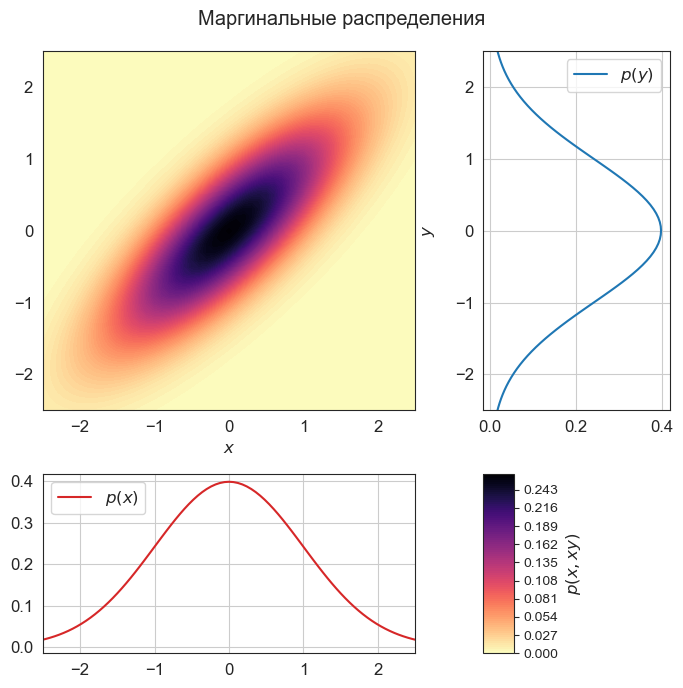

In [14]:
# Plot the marginal distributions
seaborn.set_style('white')
fig = plt.figure(figsize=(7, 7))
gs = gridspec.GridSpec(2, 2, width_ratios=[2, 1], height_ratios=[2, 1])
# gs.update(wspace=0., hspace=0.)
plt.suptitle('Маргинальные распределения')

# Plot surface on top left
ax1 = plt.subplot(gs[0])
x, y, p = generate_gauss_surface(mean, cov)
# Plot bivariate distribution
con = ax1.contourf(x, y, p, 100, cmap=cm.magma_r)
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')
ax1.yaxis.set_label_position('right')
ax1.axis([-2.5, 2.5, -2.5, 2.5])

# Plot y
ax2 = plt.subplot(gs[1])
py = stats.norm.pdf(y_var, mean_y, Sigma_22**0.5)
# Plot univariate distribution
ax2.plot(py, y_var, '-', c=cm.tab10(0), label=f'$p(y)$')
ax2.legend(loc=1)
# ax2.set_xlabel('density')
ax2.set_ylim(-2.5, 2.5)
ax2.grid(True)

# Plot x
ax3 = plt.subplot(gs[2])
px = stats.norm.pdf(x_var, mean_x, Sigma_11**0.5)
# Plot univariate distribution
ax3.plot(x_var, px, '-', c=cm.tab10(3), label=f'$p(x)$')
ax3.legend(loc=2)
# ax3.set_ylabel('density')
ax3.yaxis.set_label_position('right')
ax3.set_xlim(-2.5, 2.5)
ax3.grid(True)

# Clear axis 4 and plot colarbar in its place
ax4 = plt.subplot(gs[3])
ax4.set_visible(False)
divider = make_axes_locatable(ax4)
cax = divider.append_axes('left', size='20%', pad=0.05)
cbar = fig.colorbar(con, cax=cax)
cbar.ax.set_ylabel('$p(x, xy)$')
cbar.ax.tick_params(labelsize=10)
plt.tight_layout()
plt.show()

### Условное распределение

Условное распределение случайной величины $\mathbf{y}$ при условии $\mathbf{x}$ можно получить с помощью формулы Байеса
$$
  f(\mathbf{y}|\mathbf{x}) = \frac{f(\mathbf{x}, \mathbf{y})}{f(\mathbf{x})} \propto 
  \frac{\exp\left\{(\mathbf{x, y})^\top \Sigma^{-1} (\mathbf{x, y})\right\}}{\exp\left\{\mathbf{x}^\top \Sigma_{11}^{-1} \mathbf{x}\right\}} \label{eq:GP_bayes}\tag{1}.
$$

Оно также подчиняется нормальному закону:
$$ f(\mathbf{y}|\mathbf{x}) = \mathcal{N}(\mu_{y|x}, \Sigma_{y|x}) $$

с *условным математическим ожиданием*
$$ \mu_{y|x} = \mu_y + \Sigma_{21}\Sigma_{11}^{-1}(\mathbf{x}-\mu_x) \label{eq:GP_mean}\tag{2} $$

и *условной ковариационной матрицей*
$$ \Sigma_{y|x} = \Sigma_{22} - \Sigma_{21} \Sigma_{11}^{-1} \Sigma_{12}. \label{eq:GP_cov}\tag{3} $$

Выражение $\eqref{eq:GP_mean}$ определяет функцию *линейной регрессии* (зависимости условного математического ожидания вектора $\mathbf{y}$ от заданного значения случайного вектора $\mathbf{x}$), где $\Sigma_{21}\Sigma_{11}^{-1}$ &mdash; матрица коэффициентов регрессии.

Сдвиг математического ожидания можно рассматривать как невязку условной переменной $(\mathbf{x}-\mu_x)$, нормализованную с ковариационной матрицей условной переменной $\Sigma_{11}$ и преобразованную в пространство переменной $\mathbf{y}$. Последнее делается с помощью матрицы ковариаций между $\mathbf{y}$ и $\mathbf{x}$ &mdash; $\Sigma_{21}$.

Построим условные распределения $f(x|y= 1.5)$ и $f(y|x=-1)$.

In [15]:
# Calculate x|y
y_condition  = 1.5  # To condition on y
mean_xgiveny = mean_x + (Sigma_12 / Sigma_22 * (y_condition - mean_y))
cov_xgiveny  = Sigma_11 - Sigma_12 / Sigma_22 * Sigma_12
print(f'mean_x|y =  {mean_xgiveny:0.2}, cov_x|y = {cov_xgiveny:0.4}')

# Calculate y|x
x_condition  = -1.  # To condition on x
mean_ygivenx = mean_y + (Sigma_12 / Sigma_11 * (x_condition - mean_x))
cov_ygivenx  = Sigma_22 - (Sigma_12 / Sigma_11 * Sigma_12)
print(f'mean_y|x = {mean_ygivenx:0.2}, cov_y|x = {cov_ygivenx:0.4}')

mean_x|y =  1.2, cov_x|y = 0.36
mean_y|x = -0.8, cov_y|x = 0.36


In [16]:
# regression lines
x_regression = mean_x + (Sigma_12 / Sigma_22 * (y_var - mean_y))
y_regression = mean_y + (Sigma_12 / Sigma_11 * (x_var - mean_x))

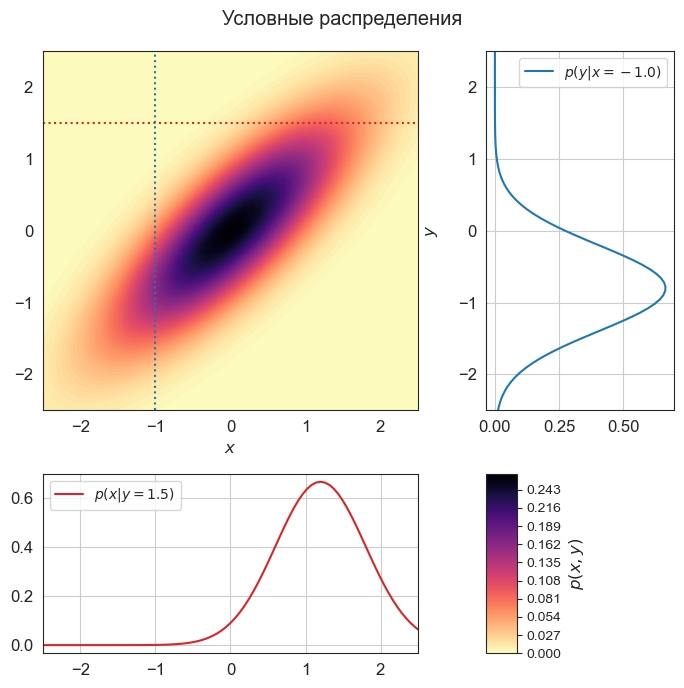

In [17]:
# Plot the conditional distributions
seaborn.set_style('white')
fig = plt.figure(figsize=(7, 7))
gs = gridspec.GridSpec(
    2, 2, width_ratios=[2, 1], height_ratios=[2, 1])
# gs.update(wspace=0., hspace=0.)
plt.suptitle('Условные распределения')

# Plot surface on top left
ax1 = plt.subplot(gs[0])
x, y, p = generate_gauss_surface(mean, cov)
# Plot bivariate distribution
con = ax1.contourf(x, y, p, 100, cmap=cm.magma_r)
# condition sections
ax1.plot([-2.5, 2.5], [y_condition, y_condition], ':', c=cm.tab10(3))
ax1.plot([x_condition, x_condition], [-2.5, 2.5], ':', c=cm.tab10(0))
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')
ax1.yaxis.set_label_position('right')
ax1.axis([-2.5, 2.5, -2.5, 2.5])

# regression plots
# ax1.plot(x_var,y_regression,'-',c=cm.tab10(0),label=r'$y(x)=\mathrm{E(y|x)}$')
# ax1.plot(x_regression,y_var,'-',c=cm.tab10(3),label=r'$x(y)=\mathrm{E(x|y)}$')
# ax1.legend(loc=4, fontsize=10)

# Plot y|x
ax2 = plt.subplot(gs[1])
pyx = stats.norm.pdf(y_var, mean_ygivenx, cov_ygivenx**0.5)
# Plot univariate distribution
ax2.plot(pyx, y_var, '-', c=cm.tab10(0), label=f'$p(y|x={x_condition:.1f})$')
ax2.legend(loc=1, fontsize=10)
# ax2.set_xlabel('density')
ax2.set_ylim(-2.5, 2.5)
ax2.grid(True)

# Plot x|y
ax3 = plt.subplot(gs[2])
pxy = stats.norm.pdf(x_var, mean_xgiveny, cov_xgiveny**0.5)
# Plot univariate distribution
ax3.plot(x_var, pxy, '-', c=cm.tab10(3), label=f'$p(x|y={y_condition:.1f})$')
ax3.legend(loc=2, fontsize=10)
# ax3.set_ylabel('density')
ax3.yaxis.set_label_position('right')
ax3.set_xlim(-2.5, 2.5)
ax3.grid(True)

# Clear axis 4 and plot colarbar in its place
ax4 = plt.subplot(gs[3])
ax4.set_visible(False)
divider = make_axes_locatable(ax4)
cax = divider.append_axes('left', size='20%', pad=0.05)
cbar = fig.colorbar(con, cax=cax)
cbar.ax.set_ylabel('$p(x, y)$')
cbar.ax.tick_params(labelsize=10)
plt.tight_layout()
plt.show()

На рисунке выше пунктирными линиями изображены сечения $x_{condition} = -1.0$ и $y_{condition} = 1.5$.
Сплошные линии показывают линии регрессии $y$ по $x$ (синий цвет) и $x$ по $y$ (красный цвет).

Рисунок иллюстрирует в частности тот факт, что плотность условного распределения является сечением плотности совместного распределения, отнормированным на соответствующее значение частного распределения.
$$
  f_{\eta|\xi}(y|x=-1) = \frac{f_{\xi,\eta}(x=-1, y)}{f_{\xi}(x=-1)}.
$$

---

## Дополнительно

Применяя формулу Байеса ([1](#mjx-eqn-eq:GP_bayes)), получите формулы для условного математического ожидания ([2](#mjx-eqn-eq:GP_mean)) и условной ковариационной матрицы ([3](#mjx-eqn-eq:GP_cov)). *Подсказка*: используёте следующий результат для обращения блочной матрицы:
$$
\Sigma =
\begin{bmatrix}
    P & Q \\
    R & S
\end{bmatrix},
\quad
\Sigma^{-1} =
\begin{bmatrix}
    \tilde{P} & \tilde{Q} \\
    \tilde{R} & \tilde{S}
\end{bmatrix},
$$
где
$$
\begin{aligned}
    \tilde{P} &\;= \left(P-QS^{-1}R\right)^{-1}     & =\;& P^{-1} + P^{-1}Q\tilde{S}RP^{-1} \\
    \tilde{Q} &\;= -\tilde{P}QS^{-1}                & =\;& -P^{-1}Q\tilde{S} \\
    \tilde{R} &\;= -S^{-1}R\tilde{P}                & =\;& -\tilde{S}RP^{-1}  \\
    \tilde{S} &\;= S^{-1} + S^{-1}R\tilde{P}QS^{-1} & =\;& \left(S-RP^{-1}Q\right)^{-1}.
\end{aligned}
$$

---

## Источники

1. *Чернова Н.И.* Математическая статистика: Учебное пособие &mdash; Новосиб. гос. ун-т, 2007. &mdash; 148 с.
1. *Ширяев А.Н.* Вероятность &mdash; 1. &mdash; М.: МЦНМО, 2007. &mdash; 517 с.
1. *Roelants P.* [Multivariate normal distribution](https://peterroelants.github.io/posts/multivariate-normal-primer/).
1. *Rasmussen C.E., Williams C.K.I.* [Gaussian Processes for Machine Learning](http://www.gaussianprocess.org/gpml/). &mdash; The MIT Press, 2006. &mdash; 248 p.

In [18]:
# Versions used
print('Python: {}.{}.{}'.format(*sys.version_info[:3]))
print('numpy: {}'.format(np.__version__))
print('matplotlib: {}'.format(matplotlib.__version__))
print('seaborn: {}'.format(seaborn.__version__))

Python: 3.7.16
numpy: 1.20.3
matplotlib: 3.5.1
seaborn: 0.12.2
